In [ ]:
#@title ドライブをマウント
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title データを保存するディレクトリのパスを指定
#@markdown ランタイムに接続しドライブを後、コピーしてくる<br>
#@markdown 後ろの / は追加するので、追記は不要<br>

cwd = "/content/drive/MyDrive/RNA-seq/Outputs/Hypoxia2" #@param {type:"string"}
cwd = cwd + "/"

# 必要なモジュールをインポートする
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

# カレントディレクトリの変更
import os
os.makedirs(cwd , exist_ok = True)
os.chdir(cwd)
currentdir = os.getcwd()

In [ ]:
#@title 実験名を定義
exp_name = "Hypoxia2" #@param {type:"string"}
exp_name = exp_name + "_"

In [ ]:
#@title DEGと平均行を追加したTPMデータのパスを定義
df_tpm_path =  "/content/drive/MyDrive/RNA-seq/Outputs/Hypoxia2/Hypoxia2_DEGavetpm.csv" #@param {type:"string"}
df_tpm = pd.read_csv(df_tpm_path , index_col = 0)
df_tpm

,product,N_DC_1,N_DC_2,N_DC_3,N_DC_ave,H_DC_1,H_DC_2,H_DC_3,H_DC_ave,DEG,DEG_log2
Geneid,,,,,,,,,,,
ENSG00000000003,TSPAN6,35.429129,30.044254,37.929150,34.467511,32.847463,29.934867,40.241104,34.341144,0.996437,-0.005149
ENSG00000000005,TNMD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
ENSG00000000419,DPM1,127.006436,116.304474,144.631756,129.314222,140.908156,146.288098,153.640571,146.945609,1.135299,0.183072
ENSG00000000457,SCYL3,6.785430,5.965235,6.699545,6.483403,6.202960,7.992398,6.595434,6.930264,1.059714,0.083674
ENSG00000000460,C1orf112,3.220708,6.265905,4.937333,4.807982,2.634051,3.643118,2.929043,3.068737,0.700542,-0.513456
...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000285990,AL589743.7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
ENSG00000285991,AL355312.5,0.044119,0.000000,0.036128,0.026749,0.000000,0.000000,0.000000,0.000000,0.973948,-0.038084
ENSG00000285992,AC120036.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000


＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝<br>
読み込んだデータから、必要なデータを抽出する

In [ ]:
#@markdown 探すものの名前をカンマ区切りで入力<br>正規表現可、詳細は下のページを参考に<br>https://qiita.com/syuki-read/items/6c5f139abd676fcc0ca2
#@markdown 
drop_things = "HIF" #@param {type:"string"}
name = drop_things
drop_things = drop_things.replace(' ', '')
drop_things = drop_things.split(',')

df_tyuusyutu = pd.DataFrame()

print("検索ワード:")
for i in range(len(drop_things)):
  print(drop_things[i], end="   ")
  df_tmp = df_tpm[df_tpm["product"].str.contains(drop_things[i] , regex=True)]
  df_tmp = df_tmp.sort_values("product")
  df_tyuusyutu = pd.concat([df_tyuusyutu, df_tmp])

df_tyuusyutu = df_tyuusyutu.drop_duplicates(subset='product')

# printして確認
print("\n=====================================")
print(df_tyuusyutu.to_string(index= False))

検索ワード:
HIF   
   product      N_DC_1      N_DC_2      N_DC_3    N_DC_ave      H_DC_1      H_DC_2      H_DC_3    H_DC_ave       DEG  DEG_log2
     HIF1A  392.744266  427.941207  517.950823  446.212099  260.820083  262.861009  317.316305  280.332466  0.629081 -0.668683
 HIF1A-AS1    1.713686    1.407229    4.490502    2.537139    2.878378    1.020650    4.177580    2.692203  1.043839  0.061899
 HIF1A-AS2    3.354066    3.873179    1.029951    2.752399   17.164960   12.901425    9.794714   13.287033  3.807440  1.928821
    HIF1AN    8.602189    8.747616    9.628185    8.992663    8.391348    8.586630    8.526057    8.501345  0.950832 -0.072737
   HIF1AP1    1.276941    0.000000    1.045646    0.774196    0.000000    0.000000    0.000000    0.000000  0.563636 -0.827165
     HIF3A    1.922047    1.698895    0.961829    1.527591    2.185862    1.324939    1.220187    1.576996  1.019546  0.027927


In [ ]:
# csvファイル形式で抽出してきた遺伝子を保存
df_tyuusyutu.to_csv(name + ".csv" , index = False)

＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝<br>
グラフを描画する

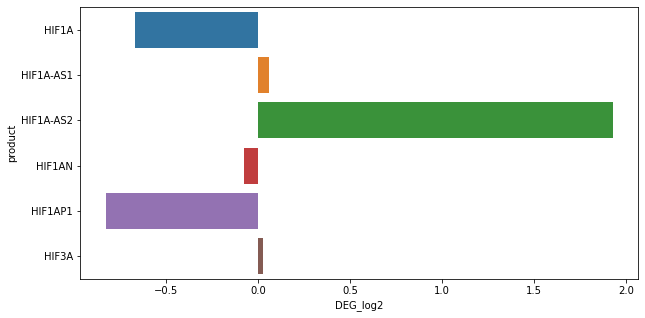

In [ ]:
#@title 抽出した遺伝子のDEG_log2値をグラフ化
plt.figure(facecolor = "white" , figsize=(10, 5))
sns.barplot(x="DEG_log2" , y="product" , data = df_tyuusyutu)

In [1]:
#@title N数の定義と必要データを纏めたdfの作成
n_num = 3 #@param {type:"integer"}
df = df_tyuusyutu.copy()

df

NameError: ignored

['HIF1A', 'HIF1A-AS1', 'HIF1A-AS2', 'HIF1AN', 'HIF1AP1', 'HIF3A']


<BarContainer object of 12 artists>

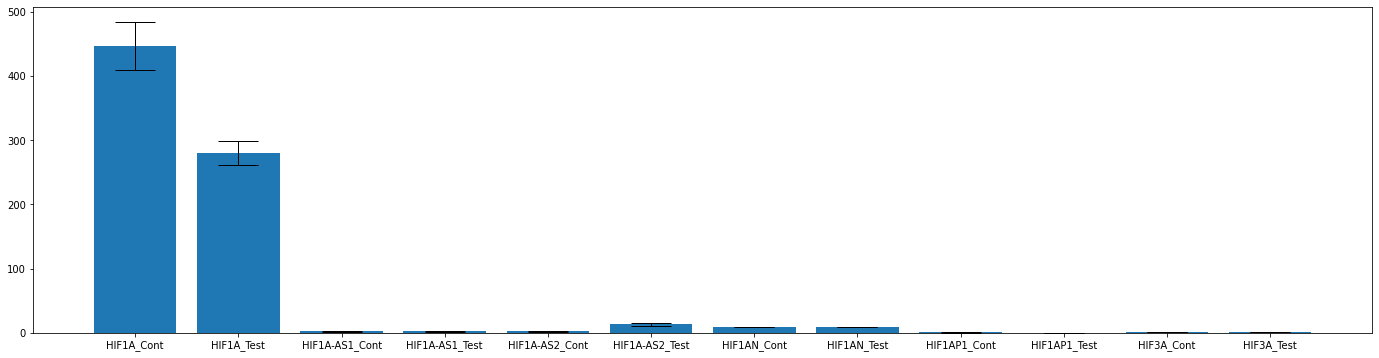

In [ ]:
#@title 平均値にエラーバー(標準誤差)をつけたグラフを描画
df_e = df.set_index("product")
df_e.drop(["DEG" , "DEG_log2"] , axis = 1 , inplace = True)

for i in range(len(df_e)):
  if df_e.iloc[i , :].sum(axis = 0) == 0:
    df_e.drop(df_e.index[i] , axis = 0 , inplace = True)

x = list(df_e.index)
print(x)

df_ave = df_e.iloc[: , [n_num , 2 * n_num + 1]]
df_e.drop(list(df_ave) , axis = 1 , inplace = True)
a = df_e.to_numpy().reshape(len(x) * 2 , n_num)

index_name = []
for gene in x:
  index_name = index_name + [gene + "_Cont" , gene + "_Test"]

y_mean = []
for i in range(len(df_ave)):
  y_mean = y_mean + [df_ave.iloc[i , 0] , df_ave.iloc[i , 1]]

df_e2 = pd.DataFrame(a , index = index_name ,columns = np.arange(n_num) +1)
y_sd = df_e2.std(1) / np.sqrt(n_num)
error_bar_options = {"lw":1 , "capthick":1 , "capsize": 20}

fig = plt.figure(facecolor = "white" , figsize=(len(x) * 4 , len(x)))
ax = fig.add_subplot()
ax.bar(index_name , y_mean , yerr = y_sd , error_kw = error_bar_options)

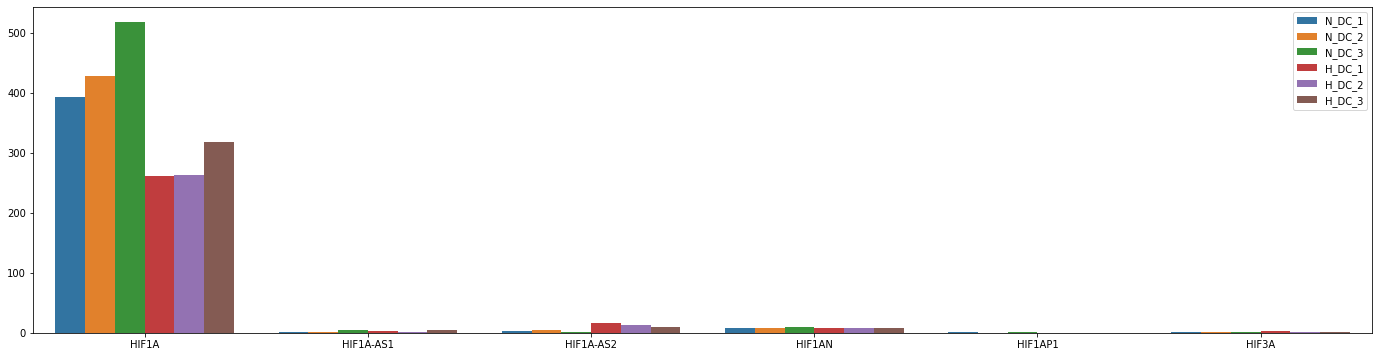

In [ ]:
#@title 平均を使わず、各データの値を比較
a = df_e.to_numpy().reshape(len(x) * 2 * n_num , 1)
b = list(df_e)

index_name = []
hue_name = []
for i in x:
  hue_name = hue_name + b
  for j in range(n_num * 2):
    index_name = index_name + [i]

fig = plt.figure(facecolor = "white" , figsize=(len(x) * 4 , len(x)))
ax = fig.add_subplot()
a = a.flatten()
sns.barplot(x = index_name , y = a , hue = hue_name)